# Load database

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv

In [2]:
# Carregar variáveis de ambiente do arquivo .env
load_dotenv()

# Obter caminhos do arquivo csv e do diretório de extração das variáveis de ambiente
contas_path = os.getenv('CONTAS_CSV')

In [3]:
# Carregar o CSV em um DataFrame Pandas
df_contas = pd.read_csv(contas_path)

# Verificar as primeiras linhas do DataFrame para garantir que os dados foram carregados corretamente
df_contas.head()


,num_conta,cod_cliente,cod_agencia,cod_colaborador,tipo_conta,data_abertura,saldo_total,saldo_disponivel,data_ultimo_lancamento
0,53,53,1,7,PF,2011-05-24 15:30:00 UTC,2984.7615,2814.67,2019-07-02 11:03:46 UTC
1,190,190,1,7,PF,2014-10-17 14:48:00 UTC,4262.4322,4191.86,2021-03-25 12:00:15 UTC
2,191,191,1,7,PF,2013-03-23 14:14:00 UTC,3266.5680,3080.71,2016-09-09 23:34:15 UTC
3,203,203,1,7,PF,2016-08-03 16:13:00 UTC,21241.5424,19461.56,2022-12-28 07:58:24 UTC
4,254,254,1,7,PF,2012-10-24 13:48:00 UTC,13335.6966,13197.54,2013-12-20 22:20:00 UTC


**Análise inicial do Dataframe**

In [113]:
df_contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_conta               999 non-null    int64  
 1   cod_cliente             999 non-null    int64  
 2   cod_agencia             999 non-null    int64  
 3   cod_colaborador         999 non-null    int64  
 4   tipo_conta              999 non-null    object 
 5   data_abertura           999 non-null    object 
 6   saldo_total             999 non-null    float64
 7   saldo_disponivel        999 non-null    float64
 8   data_ultimo_lancamento  999 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB


In [117]:
df_contas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_conta,999.0,500.000000,288.530761,1.000,250.500,500.0000,749.5000,999.0000
cod_cliente,999.0,500.000000,288.530761,1.000,250.500,500.0000,749.5000,999.0000
cod_agencia,999.0,5.211211,2.432338,1.000,3.000,7.0000,7.0000,10.0000
cod_colaborador,999.0,52.997998,27.558209,1.000,26.000,54.0000,83.5000,100.0000
saldo_total,999.0,26543.407216,41872.096136,1.221,938.142,11668.1467,35410.1086,419923.1778
saldo_disponivel,999.0,25731.185586,40288.019468,0.600,918.485,11325.9600,33926.2100,411617.0600


**Verificar dados faltantes**

In [115]:
df_contas.isna().any()

num_conta                 False
cod_cliente               False
cod_agencia               False
cod_colaborador           False
tipo_conta                False
data_abertura             False
saldo_total               False
saldo_disponivel          False
data_ultimo_lancamento    False
dtype: bool

**Abertura de contas ao longo do tempo**

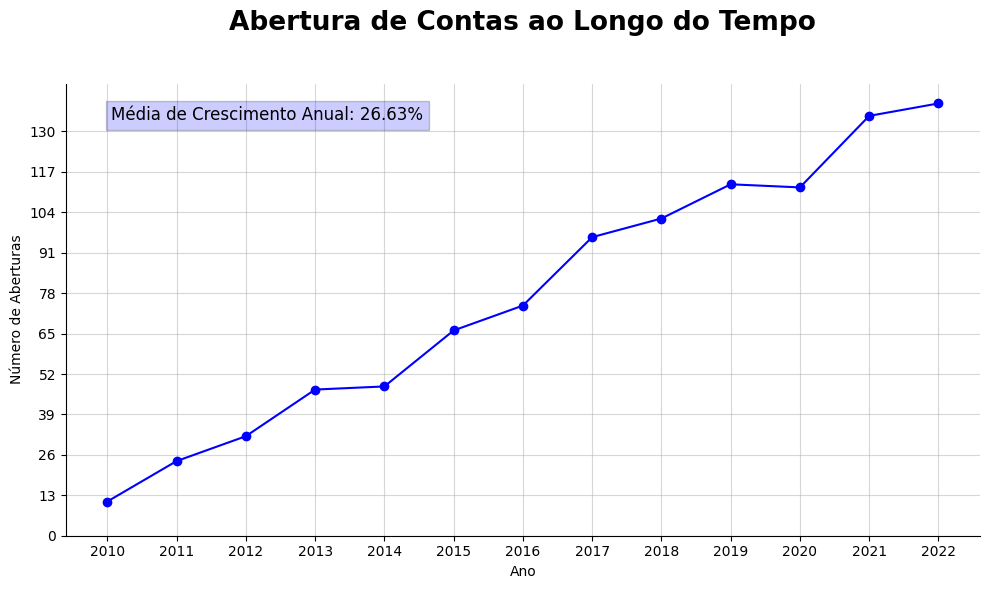

In [129]:
# Converter a coluna data_abertura para datetime
df_contas['data_abertura'] = pd.to_datetime(df_contas['data_abertura'])

# Agrupar por ano de abertura e contar o número de contas
contas_por_ano = df_contas['data_abertura'].dt.year.value_counts().sort_index()

# Calcular a diferença percentual no número de contas abertas a cada ano
contas_por_ano_diff = contas_por_ano.pct_change() * 100

# Calcular a média de crescimento anual, ignorando os valores NaN
media_crescimento_anual = contas_por_ano_diff.mean()

# Plotar gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(contas_por_ano.index, contas_por_ano.values, marker='o', linestyle='-', color='blue', label='Abertura de Contas')
plt.title('Abertura de Contas ao Longo do Tempo', y=1.1, fontweight='bold', fontsize=19)
plt.xlabel('Ano')
plt.ylabel('Número de Aberturas')
plt.xticks(contas_por_ano.index)
plt.yticks(range(0, int(contas_por_ano.max())+1, int(contas_por_ano.max()/10)))
plt.grid(True, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionar a média de crescimento anual como texto no gráfico
plt.text(0.05, 0.95, f'Média de Crescimento Anual: {media_crescimento_anual:.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='blue', alpha=0.2))

plt.tight_layout()
plt.show()


**Saldo total por agência**


In [147]:
# # Carregar o arquivo agencia.csv
df_agencia = pd.read_csv('agencias.csv')

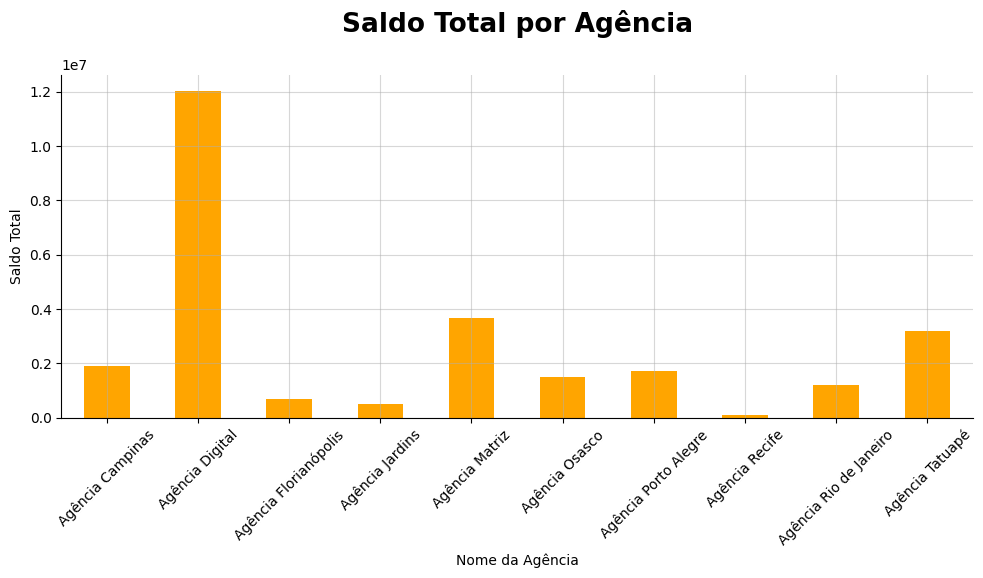

In [149]:
# Merge dos dados da conta com os dados da agência para obter os nomes das agências
df_contas_com_nome_agencia = df_contas.merge(df_agencia[['cod_agencia', 'nome']], on='cod_agencia')

# Somar os saldos totais por agência
saldo_total_por_agencia = df_contas_com_nome_agencia.groupby('nome')['saldo_total'].sum()

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
saldo_total_por_agencia.plot(kind='bar', color='orange')
plt.title('Saldo Total por Agência', y=1.1, fontweight='bold', fontsize=19)
plt.xlabel('Nome da Agência')
plt.ylabel('Saldo Total')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

**Saldo disponível vs. Saldo total**

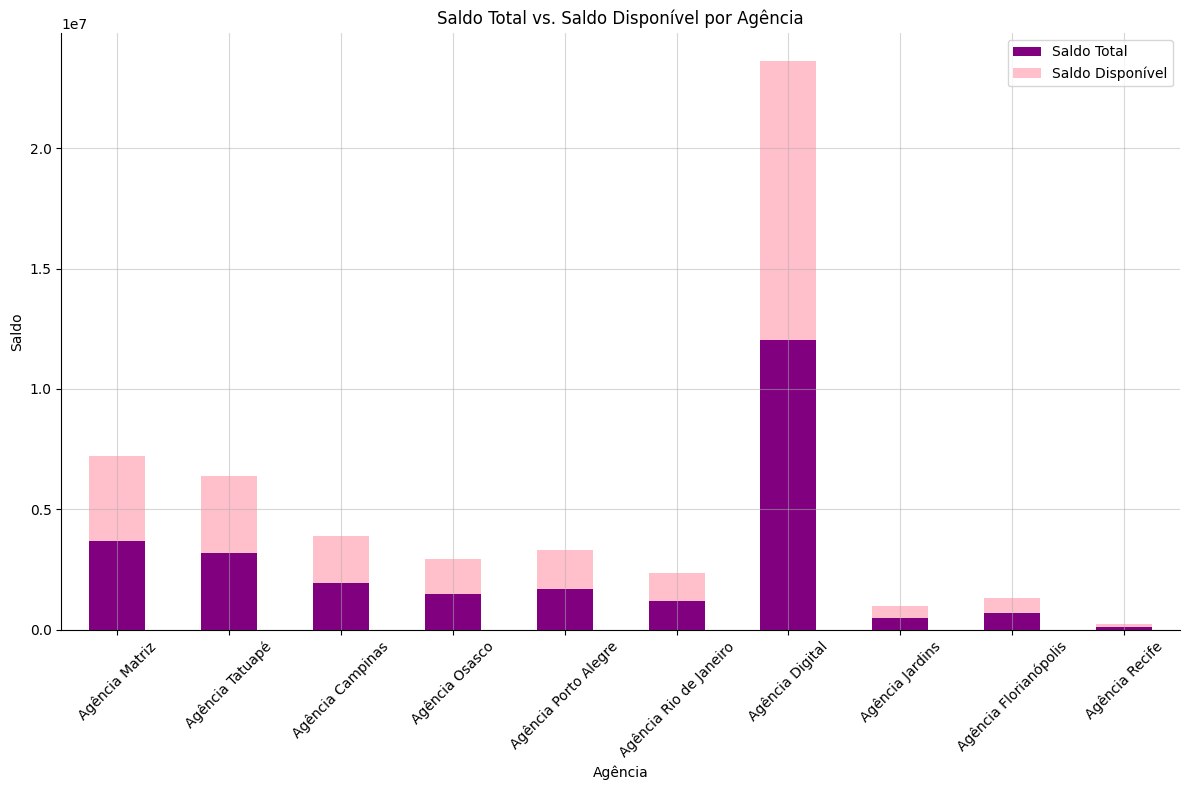

In [145]:
# Calcular a diferença entre saldo total e saldo disponível
df_contas['dif_saldo'] = df_contas['saldo_total'] - df_contas['saldo_disponivel']

# Agrupar os saldos por código de agência
df_saldos = df_contas.groupby('cod_agencia')[['saldo_total', 'saldo_disponivel']].sum().reset_index()

# Adicionar o nome das agências
df_saldos = df_saldos.merge(df_agencia[['cod_agencia', 'nome']], on='cod_agencia')

# Plotar gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(12, 8))
bars = df_saldos.set_index('nome')[['saldo_total', 'saldo_disponivel']].plot(kind='bar', stacked=True, ax=ax, color=['purple', 'pink'])

# Ajustar os títulos e rótulos
plt.title('Saldo Total vs. Saldo Disponível por Agência')
plt.xlabel('Agência')
plt.ylabel('Saldo')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionar os valores acima das barras
#  for bar in bars.containers:
#      bars.bar_label(bar, label_type='edge', padding=3, color='black', fontsize=10, fmt='%.2f')

plt.legend(['Saldo Total', 'Saldo Disponível'])
plt.tight_layout()
plt.show()

Agência Digital é a que mais tem saldo disponível.